In [1]:
import pandas as pd
import os
import matplotlib.pyplot as plt

In [2]:
"""settingup matplotlib for jupyter notebook"""
from matplotlib.font_manager import FontProperties
#import mpld3
#mpld3.enable_notebook()
#plt.rcParams['figure.figsize']=[9.5,6]

In [3]:
def saveDataFrame(dataframes,filepath,names):
    writer = pd.ExcelWriter(filepath, engine='xlsxwriter')
    for df,sname in zip(dataframes,names):
        df.to_excel(writer,sheet_name=sname)   
    writer.save()

In [4]:
def autolabelBottom(rects,ax):
    """
    Attach a text label above each bar displaying its height
    """
    for rect in rects:
        height = rect.get_height()
        val=int(height)
        if val > 0:
            ax.text(rect.get_x() + rect.get_width()/2., 0.5*height,
                    '%d' % int(height),
                    ha='center', va='top',color='white')
def autolabelMiddle(rects1,rects2,ax):
    """
    Attach a text label above each bar displaying its height
    """
    for rect1,rect2 in zip(rects1,rects2):
        height = rect1.get_height()+rect2.get_height()
        label_pos=rect1.get_height()+rect2.get_height()*0.5
        label=rect2.get_height()
        if label >0:
            ax.text(rect1.get_x() + rect1.get_width()/2.,label_pos,
                    '%d' % int(label),
                    ha='center', va='top',color='black')
        
def autolabelTop(rects1,rects2,rects3,ax):
    """
    Attach a text label above each bar displaying its height
    """
    for rect1,rect2,rect3 in zip(rects1,rects2,rects3):
        height = rect1.get_height()+rect2.get_height()+rect3.get_height()
        print(height)
        label=rect3.get_height()
        ax.text(rect1.get_x() + rect1.get_width()/2., 1*height,
                '%d' % int(label),
                ha='center', va='top',color='white')
def autolabel2(rects,rects2,ax):
    """
    Attach a text label above each bar displaying its height
    """
    for rect1,rect2 in zip(rect1,rect2):
        height = rect.get_height()
        ax.text(rect.get_x() + rect.get_width()/2., height,
                '%d' % int(height),
                ha='center', va='top')
def drawGraph(cdf,rdf,figpath):
    mycols=list(cdf.columns)
    mytitle=cdf.iloc[0,0]
    labels= mycols[3:]
    ylabel=cdf.iloc[0,1]
    completed=list(cdf.iloc[0,3:])
    remaining=list(rdf.iloc[0,3:])
    fig,ax=plt.subplots()
    width=0.75
    xvals=[1,2,3,4,5,6,7,8]
    rect1=ax.bar(xvals,completed,width,label="complted")
    rects1=ax.bar(xvals,completed,width,label="complted")
    autolabel(rects1,ax)
    rects2=ax.bar(xvals,remaining,width,bottom=completed,label="remaining")
    autolabel(rects2,ax)
    plt.xticks(xvals,labels)
    ax.set_ylabel(completed)
    ax.set_title( mytitle)
    #ax.yaxis.grid()
    #ax.legend()
    
    #autolabel(rects2,ax)
    plt.ylabel(completed)
    plt.show()
    print(labels)
    #print(vals)
    plt.savefig(figpath)
    
    
def drawGraph2(cdf,rdf,cmdf,pmdf,figpath):
    mycols=list(cdf.columns)
    mytitle="Yearly Progress of "+cdf.iloc[0,0]
    labels= mycols[3:]
    ylabel=cdf.iloc[0,1]
    unit=cdf.iloc[0,1]
    unit_text="Unit-"+unit
    #unit=
    completed=list(cdf.iloc[0,3:])
    remaining=list(rdf.iloc[0,3:])
    current=list(cmdf.iloc[0,3:])
    prev=list(pmdf.iloc[0,3:])
    
    fig = plt.figure(figsize=(9.5,6))
    ax = fig.add_subplot(111)
    
    #fig=plt.figure()
    #ax=fig.add_axes([1,1,1,1])

    #fig,ax=plt.subplots()
    width=0.75
    xvals=[1,2,3,4,5,6,7,8]
    rects1=ax.bar(xvals,prev,width,label="Cum prev year")
    autolabelBottom(rects1,ax)
    rects2=ax.bar(xvals,current,width,bottom=prev,label="Prseent Yesr")
    autolabelMiddle(rects1,rects2,ax)
    rects3=ax.bar(xvals,remaining,width,bottom=completed,label="Remaining")
    autolabelTop(rects1,rects2,rects3,ax)    
    #autolabel(rects1,ax)
    #rects2=ax.bar(xvals,remaining,width,bottom=completed,label="remaining")
    #autolabel(rects2,ax)
    plt.xticks(xvals,labels)
    ax.set_ylabel(completed)
    ax.set_title( mytitle)
    #ax.yaxis.grid()
    fontP = FontProperties()
    #fontP.set_size('xx-small')
    fontP.set_size('medium')
    #ax.legend(handles=[rects1,rects2,rects3], title='title', bbox_to_anchor=(1.05, 1), loc='upper left', prop=fontP)
    #upper center
    ax.legend(handles=[rects1,rects2,rects3], title='legend', bbox_to_anchor=(0.5, 1.25), loc='upper center', prop=fontP)
    #ax.legend()
    
    #autolabel(rects2,ax)
    plt.ylabel(unit_text)
    plt.show()
    print(labels)
    #print(vals)
    fig.savefig('plot.pdf', dpi=300, bbox_inches='tight')
    #plt.savefig(figpath)
    
def drawGraph3(cdf,rdf,cmdf,pmdf,figpaths):
    mycols=list(cdf.columns)
    for index,row in cdf.iterrows():
        mytitle="Yearly Progress of "+cdf.iloc[index,0]
        labels= mycols[3:]
        ylabel=cdf.iloc[index,1]
        unit=cdf.iloc[index,1]
        unit_text="Unit-"+unit
    #unit=
        completed=list(cdf.iloc[index,3:])
        remaining=list(rdf.iloc[index,3:])
        current=list(cmdf.iloc[index,3:])
        prev=list(pmdf.iloc[index,3:])
    
        fig = plt.figure(figsize=(9.5,6))
        ax = fig.add_subplot(111)
    
    #fig=plt.figure()
    #ax=fig.add_axes([1,1,1,1])

    #fig,ax=plt.subplots()
        width=0.75
        xvals=[1,2,3,4,5,6,7,8]
        rects1=ax.bar(xvals,prev,width,label="Cum prev year",color=['green'])
        autolabelBottom(rects1,ax)
        rects2=ax.bar(xvals,current,width,bottom=prev,label="Prseent Year",color=['gold'])
        autolabelMiddle(rects1,rects2,ax)
        rects3=ax.bar(xvals,remaining,width,bottom=completed,label="Remaining",color=['lightcoral'])
        autolabelTop(rects1,rects2,rects3,ax)    
    #autolabel(rects1,ax)
    #rects2=ax.bar(xvals,remaining,width,bottom=completed,label="remaining")
    #autolabel(rects2,ax)
        plt.xticks(xvals,labels)
        ax.set_ylabel(completed)
        ax.set_title( mytitle)
    #ax.yaxis.grid()
        fontP = FontProperties()
    #fontP.set_size('xx-small')
        fontP.set_size('medium')
    #ax.legend(handles=[rects1,rects2,rects3], title='title', bbox_to_anchor=(1.05, 1), loc='upper left', prop=fontP)
    #upper center
        ax.legend(handles=[rects1,rects2,rects3], title='legend', bbox_to_anchor=(0.5, 1.25), loc='upper center', prop=fontP)
    #ax.legend()
    
    #autolabel(rects2,ax)
        plt.ylabel(unit_text)
        plt.show()
        print(labels)
    #print(vals)
        filename=figpaths[index]
        fig.savefig(filename, dpi=300, bbox_inches='tight')
    #plt.savefig(figpath)

def calcualteRmainingDf(indf):
    out_df=indf.copy(deep=True)
    for index,row in indf.iterrows():
        total=indf.iloc[index,2]
        for i in range(3,11):
            out_df.iloc[index,i]=total-indf.iloc[index,i]
    return out_df
def calculateCurrentMonth(indf):
    out_df=indf.copy(deep=True)
    for index,row in indf.iterrows():
        for i in range(4,11):
            out_df.iloc[index,i]=indf.iloc[index,i]-indf.iloc[index,i-1]
    return out_df
def calculateCumPreviousYear(indf):
    out_df=indf.copy(deep=True)
    for index,row in indf.iterrows():
        for i in range(4,11):
            out_df.iloc[index,i]=indf.iloc[index,i-1]
    return out_df
def buildFigPath(names,base_folder):
    ext=".pdf"
    figpaths=[]
    for name in names:
        file_name=name+ext
        full_file_name=os.path.join(base_folder, file_name)
        figpaths.append(full_file_name)
    return figpaths
    
        

F:\website\cmis6\Civilworks cost\PPT Progress Review Meeting\Component Wise Cost Brackup_ 08.11.2020.xlsx
['F:\\website\\cmis6\\Civilworks cost\\PPT Progress Review Meeting\\Inlet.pdf', 'F:\\website\\cmis6\\Civilworks cost\\PPT Progress Review Meeting\\Reg_Re_inst.pdf', 'F:\\website\\cmis6\\Civilworks cost\\PPT Progress Review Meeting\\Cons_Struc.pdf', 'F:\\website\\cmis6\\Civilworks cost\\PPT Progress Review Meeting\\Khal_Riv_New.pdf', 'F:\\website\\cmis6\\Civilworks cost\\PPT Progress Review Meeting\\Khal_Riv_Rehab.pdf', 'F:\\website\\cmis6\\Civilworks cost\\PPT Progress Review Meeting\\Full_Emb_Rep.pdf', 'F:\\website\\cmis6\\Civilworks cost\\PPT Progress Review Meeting\\Sub_Emb_Rep.pdf', 'F:\\website\\cmis6\\Civilworks cost\\PPT Progress Review Meeting\\Sub_Emb_Const.pdf', 'F:\\website\\cmis6\\Civilworks cost\\PPT Progress Review Meeting\\Reg_Rehab.pdf', 'F:\\website\\cmis6\\Civilworks cost\\PPT Progress Review Meeting\\Wmg_bld_const.pdf', 'F:\\website\\cmis6\\Civilworks cost\\PPT P

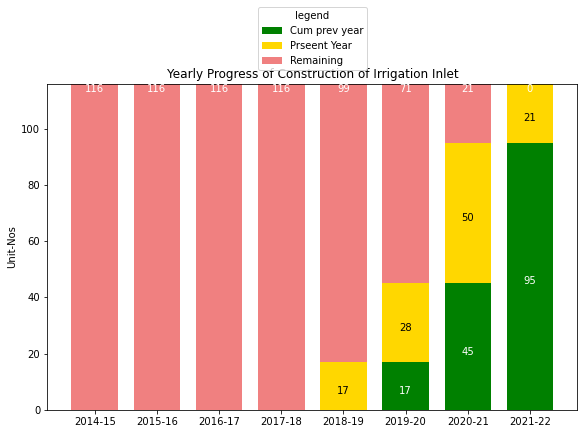

['2014-15', '2015-16', '2016-17', '2017-18', '2018-19', '2019-20', '2020-21', '2021-22']
5.0
5.0
5.0
5.0
5.0
5.0
5.0
5.0


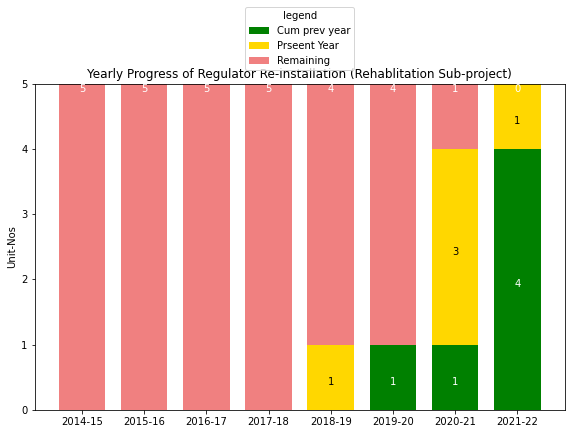

['2014-15', '2015-16', '2016-17', '2017-18', '2018-19', '2019-20', '2020-21', '2021-22']
112.0
112.0
112.0
112.0
112.0
112.0
112.0
112.0


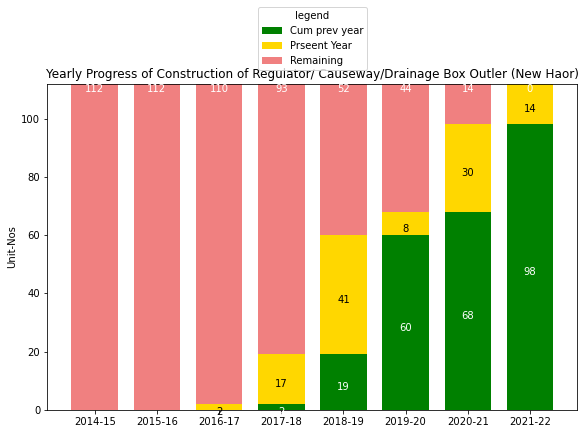

['2014-15', '2015-16', '2016-17', '2017-18', '2018-19', '2019-20', '2020-21', '2021-22']
337.954
337.954
337.954
337.954
337.954
337.954
337.954
337.954


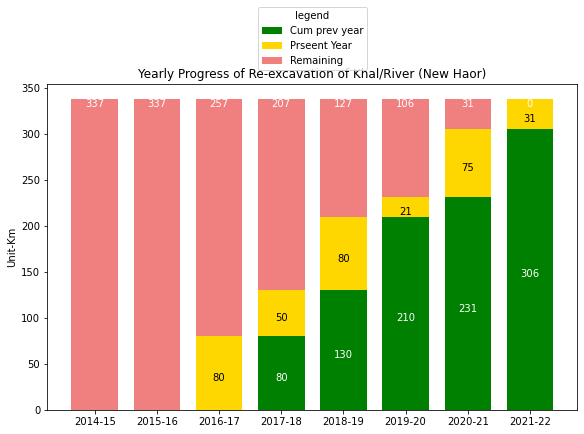

['2014-15', '2015-16', '2016-17', '2017-18', '2018-19', '2019-20', '2020-21', '2021-22']
108.974
108.974
108.974
108.974
108.974
108.974
108.974
108.974


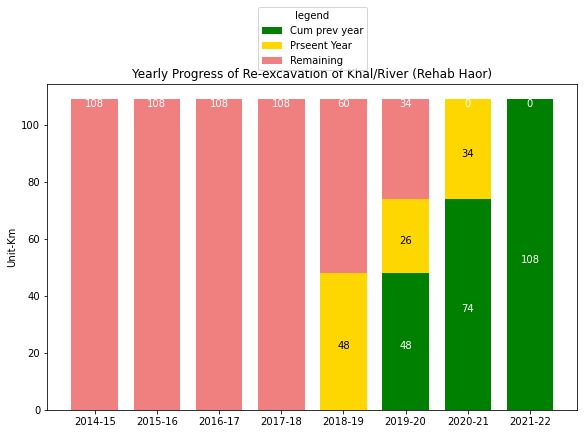

['2014-15', '2015-16', '2016-17', '2017-18', '2018-19', '2019-20', '2020-21', '2021-22']
67.11
67.11
67.11
67.11
67.11
67.11
67.11
67.11


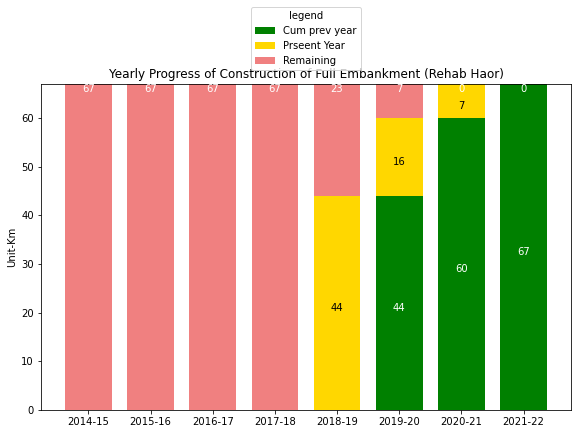

['2014-15', '2015-16', '2016-17', '2017-18', '2018-19', '2019-20', '2020-21', '2021-22']
61.21
61.21
61.21
61.21
61.21
61.21
61.21
61.21


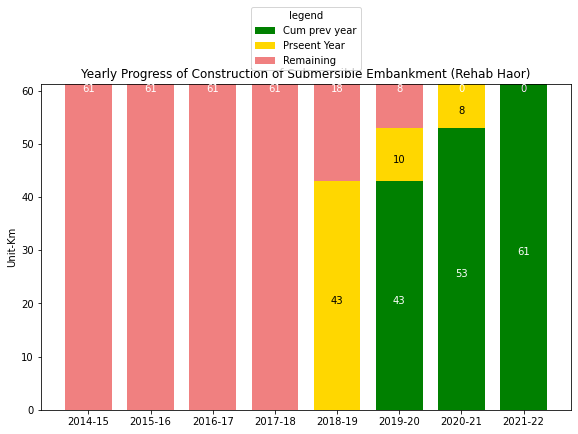

['2014-15', '2015-16', '2016-17', '2017-18', '2018-19', '2019-20', '2020-21', '2021-22']
261.653
261.653
261.653
261.653
261.653
261.653
261.653
261.653


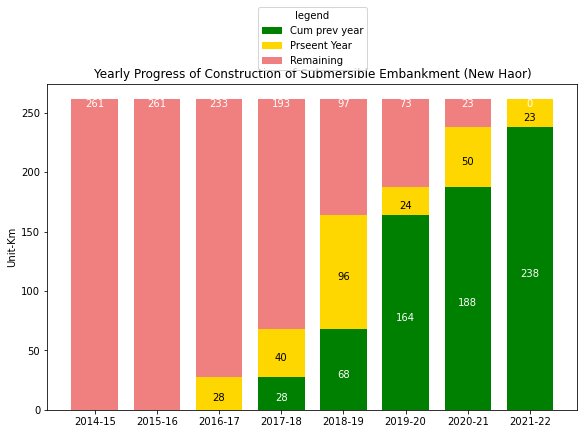

['2014-15', '2015-16', '2016-17', '2017-18', '2018-19', '2019-20', '2020-21', '2021-22']
7.0
7.0
7.0
7.0
7.0
7.0
7.0
7.0


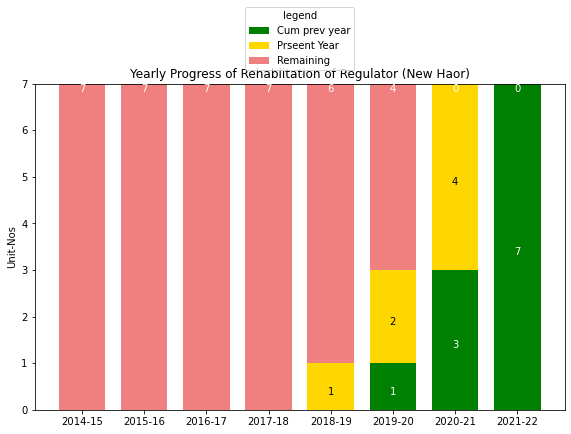

['2014-15', '2015-16', '2016-17', '2017-18', '2018-19', '2019-20', '2020-21', '2021-22']
30.0
30.0
30.0
30.0
30.0
30.0
30.0
30.0


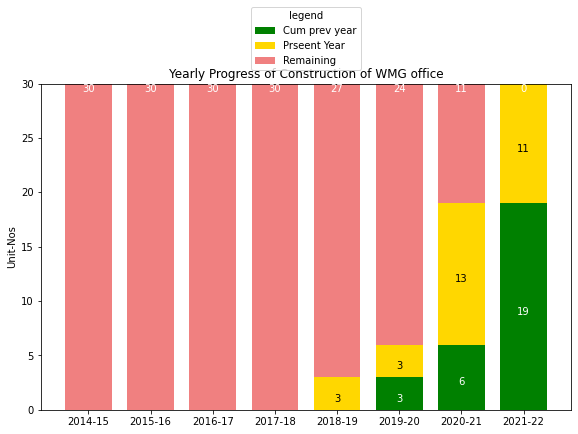

['2014-15', '2015-16', '2016-17', '2017-18', '2018-19', '2019-20', '2020-21', '2021-22']
5.0
5.0
5.0
5.0
5.0
5.0
5.0
5.0


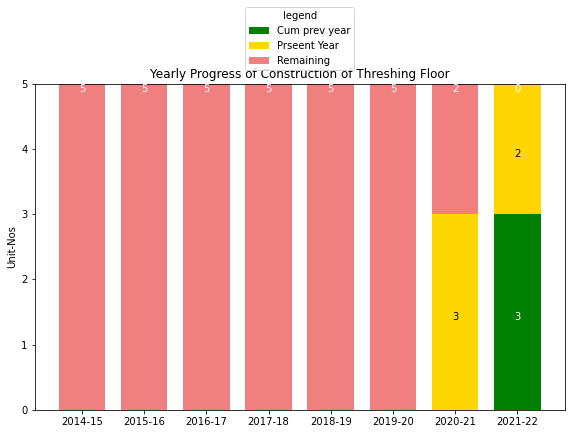

['2014-15', '2015-16', '2016-17', '2017-18', '2018-19', '2019-20', '2020-21', '2021-22']
86.0
86.0
86.0
86.0
86.0
86.0
86.0
86.0


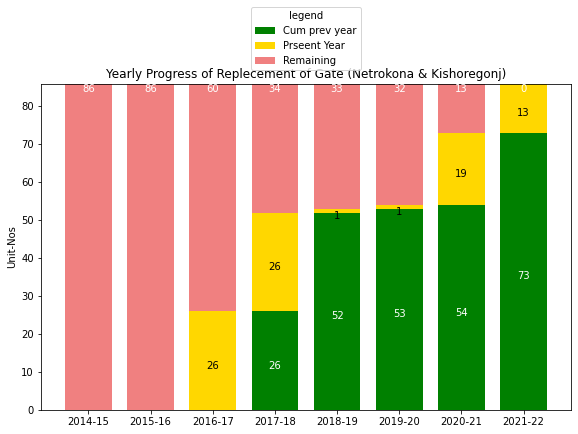

['2014-15', '2015-16', '2016-17', '2017-18', '2018-19', '2019-20', '2020-21', '2021-22']


In [5]:
#home myfolder=r'E:\Website_26_07_2020\cmis6\Civilworks cost\PPT Progress Review Meeting'
myfolder=r'F:\website\cmis6\Civilworks cost\PPT Progress Review Meeting'
inpath=os.path.join(myfolder,'Component Wise Cost Brackup_ 08.11.2020.xlsx')
outpath=os.path.join(myfolder,"dframes.xlsx")
figpath=os.path.join(myfolder,"graph1.png")
print(inpath)
sheetName="Input_data"
completed_df=pd.read_excel(inpath,sheet_name=sheetName)
completed_df.fillna(0,inplace=True)
completed_df
remaining_df=calcualteRmainingDf(completed_df)
current_df=calculateCurrentMonth(completed_df)
previous_df=calculateCumPreviousYear(completed_df)
#drawGraph2(completed_df,remaining_df,current_df,previous_df,figpath)
fignames=['Inlet','Reg_Re_inst','Cons_Struc','Khal_Riv_New','Khal_Riv_Rehab','Full_Emb_Rep','Sub_Emb_Rep','Sub_Emb_Const','Reg_Rehab',
'Wmg_bld_const','Tf_const','Rep_Gate']
figpaths=buildFigPath(fignames,myfolder)
print(figpaths)

drawGraph3(completed_df,remaining_df,current_df,previous_df,figpaths)


In [6]:
myframes=[]
mynames=[]
myframes.append(completed_df)
mynames.append("completed")
myframes.append(remaining_df)
mynames.append("remaining")
myframes.append(current_df)
mynames.append("Current_month")
myframes.append(previous_df)
mynames.append("Prev_cum")
saveDataFrame(myframes,outpath,mynames)
